In [ ]:
import pandas as pd
from pathlib import Path
file1 = Path("machine_temp_failure_missing.csv")
content = pd.read_csv(file1)
print(content)  
print(content.info()) 
content.rename(columns={"value": "temperature"}, inplace=True)
stats = content.describe()
print(stats[['temperature']])


              timestamp      value
0      02-12-2013 21:15  73.967322
1      02-12-2013 21:20  74.935882
2      02-12-2013 21:25  76.124162
3      02-12-2013 21:30  78.140707
4      02-12-2013 21:35  79.329836
...                 ...        ...
22690  19-02-2014 15:05  98.185415
22691  19-02-2014 15:10  97.804168
22692  19-02-2014 15:15  97.135468
22693  19-02-2014 15:20  98.056852
22694  19-02-2014 15:25  96.903861

[22695 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22695 entries, 0 to 22694
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  22695 non-null  object 
 1   value      21410 non-null  float64
dtypes: float64(1), object(1)
memory usage: 354.7+ KB
None
        temperature
count  21410.000000
mean      85.968188
std       13.553070
min        2.084721
25%       83.082867
50%       89.251290
75%       93.910748
max      108.510543


# New Section

In [3]:
from pathlib import Path
import pandas as pd

file1 = Path("machine_temp_failure_missing.csv")
content = pd.read_csv(file1)
content.rename(columns={"value": "temperature"}, inplace=True)
content['delta_temperature'] = content['temperature'].diff()
print(content)

              timestamp  temperature  delta_temperature
0      02-12-2013 21:15    73.967322                NaN
1      02-12-2013 21:20    74.935882           0.968560
2      02-12-2013 21:25    76.124162           1.188280
3      02-12-2013 21:30    78.140707           2.016546
4      02-12-2013 21:35    79.329836           1.189128
...                 ...          ...                ...
22690  19-02-2014 15:05    98.185415                NaN
22691  19-02-2014 15:10    97.804168          -0.381246
22692  19-02-2014 15:15    97.135468          -0.668700
22693  19-02-2014 15:20    98.056852           0.921384
22694  19-02-2014 15:25    96.903861          -1.152991

[22695 rows x 3 columns]


In [ ]:
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import hvplot.pandas

file1 = Path("machine_temp_failure_missing.csv")
content = pd.read_csv(file1)
content.rename(columns={"value": "temperature"}, inplace=True)

temperatures = content["temperature"].tolist()  

delta_temperature = [temperatures[i+1] - temperatures[i] for i in range(len(temperatures)-1)]
modified_temperatures = temperatures[:-1]  

plt.plot(modified_temperatures, delta_temperature)
plt.xlabel('TEMPERATURES')
plt.ylabel('DELTA TEMP')


plt.xlim(min(modified_temperatures), max(modified_temperatures))
plt.ylim(min(delta_temperature), max(delta_temperature))

plt.show()

df = pd.DataFrame({"temperatures": modified_temperatures, "delta_temperature": delta_temperature})
df.hvplot.line(x="temperatures", y="delta_temperature")



Output hidden; open in https://colab.research.google.com to view.

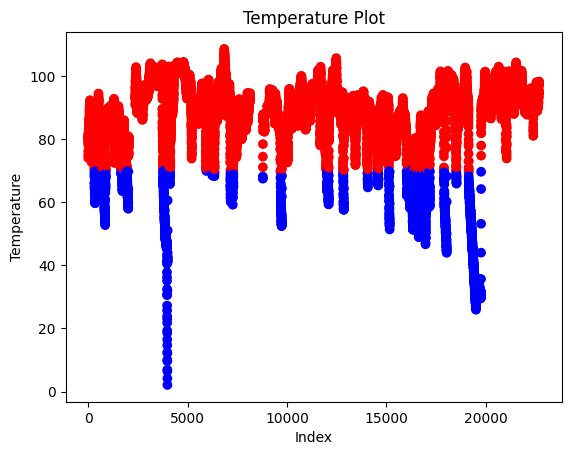

In [ ]:
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

file1 = Path("machine_temp_failure_missing.csv")
content = pd.read_csv(file1)
content.rename(columns={"value": "temperature"}, inplace=True)

temperatures = content["temperature"].tolist()

colors = ['red' if temp > 70.00 else 'blue' for temp in temperatures]

plt.scatter(range(len(temperatures)), temperatures, c=colors)
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Temperature Plot')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

def read_datasets(file_paths):
    datasets = []
    for path in file_paths:
        sets = pd.read_csv(path)
        datasets.append(sets)
    return datasets


def plot_dfs(datasets, x_column, y_column):
    for i, sets in enumerate(datasets):
        plt.plot(sets[x_column], sets[y_column], label=f"Dataset {i+1}")
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.legend()
    plt.show()


def rmse_score(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
